<a href="https://colab.research.google.com/github/ghanalk1/Car-Price-Prediction-Car-Dekho-/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **importing and exploring data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/MyDrive/dat/car_dekho.csv'
auto = pd.read_csv(url)
auto.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
auto.shape

(4340, 8)

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
# unique values for name feature
auto['name'].nunique()

1491

In [ ]:
# unique values for fuel feature
auto['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
# unique values for seller type feature
auto['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [ ]:
# unique values for transmission feature
auto['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [ ]:
# unique values for owner feature
auto['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
# distribution for numeric columns
auto.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


## **EDA**

### Distribution of numeric features

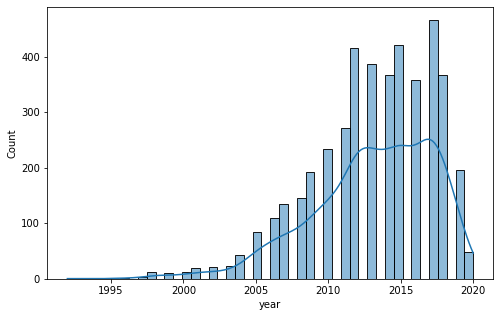

In [ ]:
# distribution of year
plt.figure(figsize=[8,5])
sns.histplot(data=auto, x='year', kde=True)

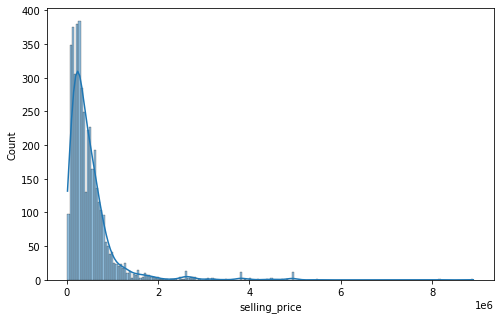

In [ ]:
# distribution of selling price
plt.figure(figsize=[8,5])
sns.histplot(data=auto, x='selling_price', kde=True)

In [ ]:
# least price for a vehicle
auto['selling_price'].min()

20000

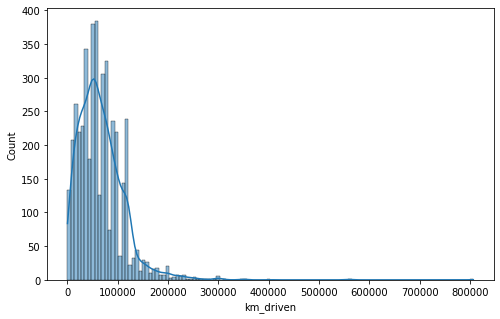

In [ ]:
# distribution of km driven
plt.figure(figsize=[8,5])
sns.histplot(data=auto, x='km_driven', kde=True)

In [ ]:
# finding the least driven car
auto['km_driven'].min()

1

### Checking for outliers

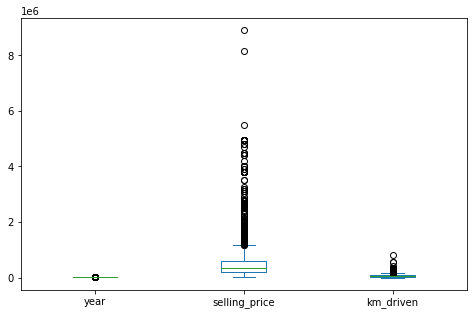

In [ ]:
auto.plot(kind='box', figsize=[8,5])

In [ ]:
# checking the two topmost outliers for selling price
auto[auto['selling_price'] >= 6000000 ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


### Insights

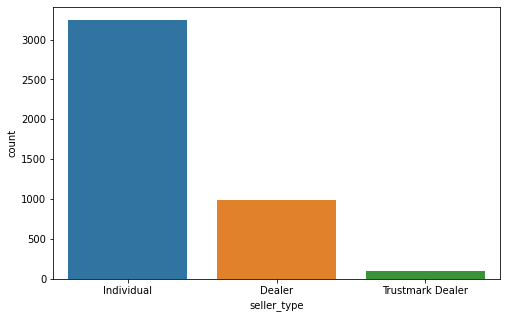

In [ ]:
# seller type
plt.figure(figsize=[8,5])
sns.countplot(data=auto, x='seller_type')

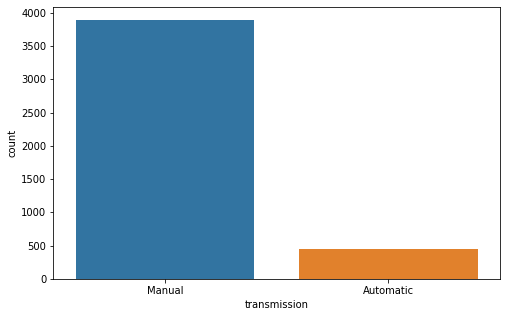

In [ ]:
# transmission
plt.figure(figsize=[8,5])
sns.countplot(data=auto, x='transmission')

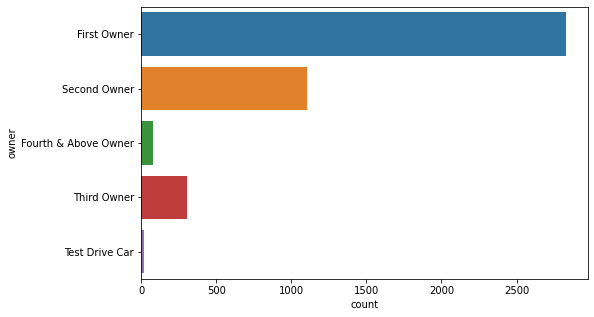

In [ ]:
# owner
plt.figure(figsize=[8,5])
sns.countplot(data=auto, y='owner')

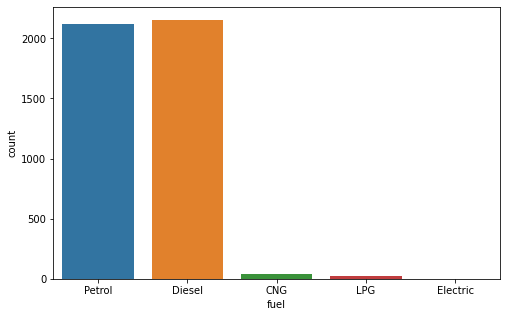

In [ ]:
# fuel
plt.figure(figsize=[8,5])
sns.countplot(data=auto, x='fuel')

### Extracting some features

In [39]:
# Extracting Manufacture name
auto['Company'] = auto['name'].str.split(' ').str[0]

In [54]:
auto['Company'].nunique()

29

In [45]:
# Extracting car name
auto['Car_name'] = auto['name'].str.split(' ').str[1]

In [47]:
auto['Car_name'].nunique()

185

### Plotting new features

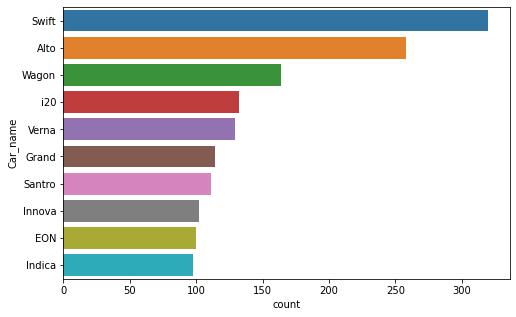

In [52]:
# most listed car
plt.figure(figsize=[8,5])
cars = auto.groupby('Car_name')['name'].count().reset_index()
cars.columns = ['Car_name', 'count']
sns.barplot(data=cars.sort_values(by='count', ascending=False)[:10], y='Car_name', x='count')

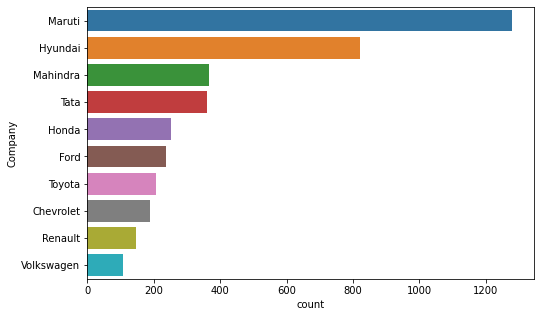

In [53]:
# most listed car maker
plt.figure(figsize=[8,5])
maker = auto.groupby('Company')['name'].count().reset_index()
maker.columns = ['Company', 'count']
sns.barplot(data=maker.sort_values(by='count', ascending=False)[:10], y='Company', x='count')

### Effect of features on selling price

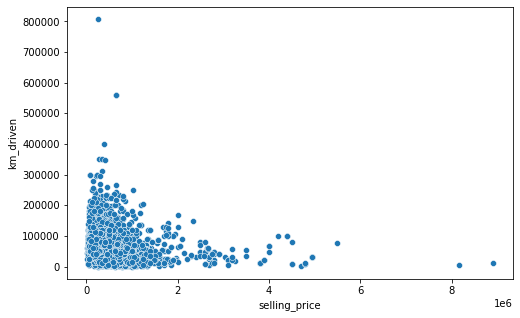

In [55]:
# selling price vs km_driven
plt.figure(figsize=[8,5])
sns.scatterplot(data=auto, x='selling_price', y='km_driven')

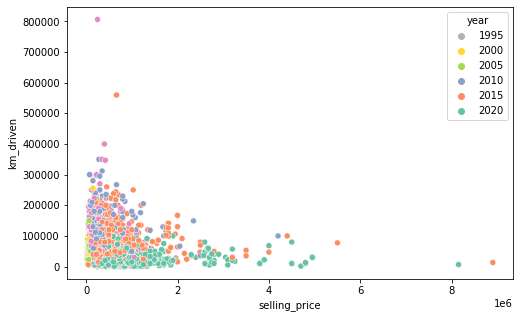

In [62]:
# with year
plt.figure(figsize=[8,5])
sns.scatterplot(data=auto, x='selling_price', y='km_driven', hue='year', palette='Set2_r')

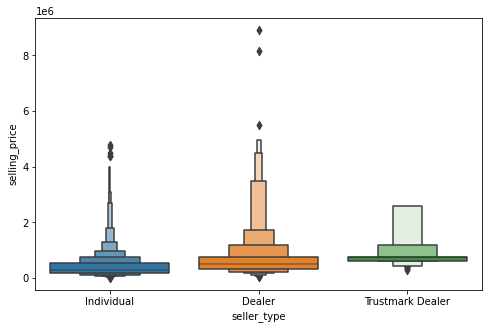

In [69]:
# selling price vs seller type
plt.figure(figsize=[8,5])
sns.boxenplot(data=auto, y='selling_price', x='seller_type')

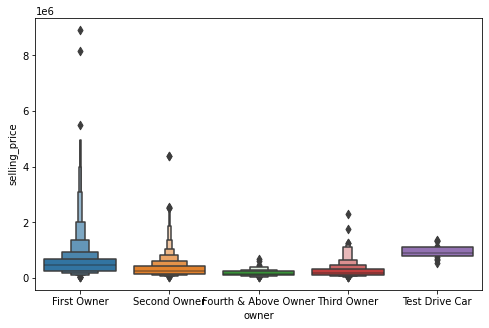

In [70]:
# selling price vs owner
plt.figure(figsize=[8,5])
sns.boxenplot(data=auto, y='selling_price', x='owner')

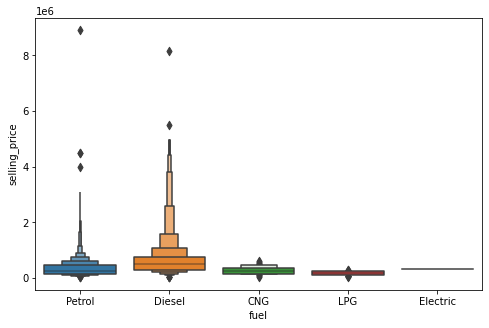

In [71]:
# selling price vs fuel
plt.figure(figsize=[8,5])
sns.boxenplot(data=auto, y='selling_price', x='fuel')

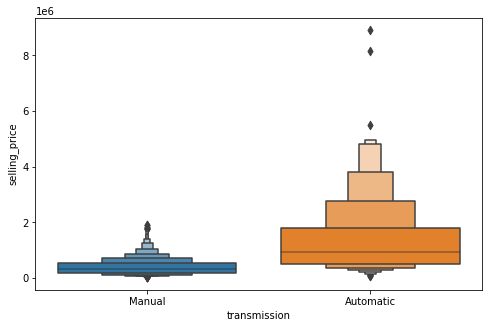

In [72]:
# selling price vs transmission
plt.figure(figsize=[8,5])
sns.boxenplot(data=auto, y='selling_price', x='transmission')

## **Feature Engineering**

In [46]:
auto.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company,Car_name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
